In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


### Load the data

In [2]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories

# ffs = ['ff94','ff99SB', 'ff03.r1', 'ff14SB']

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=2501, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = (df['Frame']-2501)/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
            df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
            df['Mouving std']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).std()
            df['av-std']=df['Mouving average']-df['Mouving std']
            df['av+std']=df['Mouving average']+df['Mouving std']
            
            df['igb'] = igb
            df['ff'] = ff
            df['ffigb'] = '{0} {1}'.format(ff, igb)
            df['igbff'] = '{0} {1}'.format(igb, ff)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0   2501              0.818         0.0000     87.077419              NaN   
1   2502              0.879         0.0001     93.570968              NaN   
2   2503              0.848         0.0002     90.270968              NaN   
3   2504              0.818         0.0003     87.077419              NaN   
4   2505              0.848         0.0004     90.270968              NaN   

   Mouving std  av-std  av+std   igb    ff      ffigb      igbff  
0          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
1          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
2          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
3          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
4          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  


In [3]:
print(df_total.tail())

       Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
57495  59996              0.242         5.7495     25.761290        27.079374   
57496  59997              0.152         5.7496     16.180645        27.066600   
57497  59998              0.394         5.7497     41.941935        27.124723   
57498  59999              0.485         5.7498     51.629032        27.176458   
57499  60000              0.424         5.7499     45.135484        27.195832   

       Mouving std     av-std     av+std   igb       ff         ffigb  \
57495    13.735845  13.343529  40.815220  igb8  ff15ipq  ff15ipq igb8   
57496    13.743018  13.323582  40.809618  igb8  ff15ipq  ff15ipq igb8   
57497    13.744355  13.380367  40.869078  igb8  ff15ipq  ff15ipq igb8   
57498    13.787829  13.388629  40.964287  igb8  ff15ipq  ff15ipq igb8   
57499    13.806269  13.389563  41.002101  igb8  ff15ipq  ff15ipq igb8   

              igbff  
57495  igb8 ff15ipq  
57496  igb8 ff15ipq  
57497  i

In [4]:
df_1ns=df_total.iloc[::10]
print(df_1ns.head())

    Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0    2501              0.818          0.000     87.077419              NaN   
10   2511              0.848          0.001     90.270968              NaN   
20   2521              0.788          0.002     83.883871              NaN   
30   2531              0.848          0.003     90.270968              NaN   
40   2541              0.758          0.004     80.690323              NaN   

    Mouving std  av-std  av+std   igb    ff      ffigb      igbff  
0           NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
10          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
20          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
30          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
40          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  


In [5]:
df_1ns=df_total.iloc[::10]
df_5ns=df_total.iloc[::50]
df_10ns=df_total.iloc[::100, :]
df_50ns=df_total.iloc[::500, :]

In [6]:
df_1ns_2=df_total.iloc[2::10]
df_5ns_2=df_total.iloc[15::50]
df_10ns_2=df_total.iloc[20::100, :]
df_50ns_2=df_total.iloc[150::500, :]

df_1ns_3=df_total.iloc[4::10]
df_5ns_3=df_total.iloc[25::50]
df_10ns_3=df_total.iloc[40::100, :]
df_50ns_3=df_total.iloc[250::500, :]

df_1ns_4=df_total.iloc[6::10]
df_5ns_4=df_total.iloc[35::50]
df_10ns_4=df_total.iloc[60::100, :]
df_50ns_4=df_total.iloc[350::500, :]

DSSP value of the fully helical version of the peptide:

In [7]:
90.9*33/31

96.76451612903227

### Helicity box plots

In the first plot, wiskers incorporate all the data:

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/el1471

KeyboardInterrupt: 

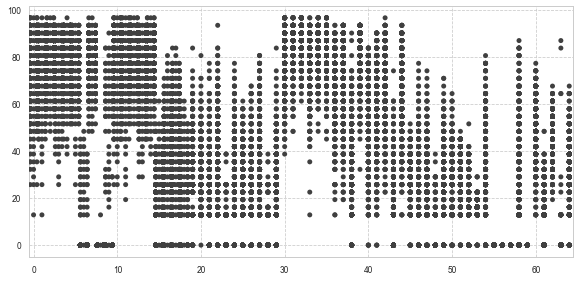

In [14]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))

ax = sns.swarmplot(x='igbff', y='Helicity (%)', data=df_10ns, color=".25")
ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_10ns, fliersize=0, linewidth=0.8,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()

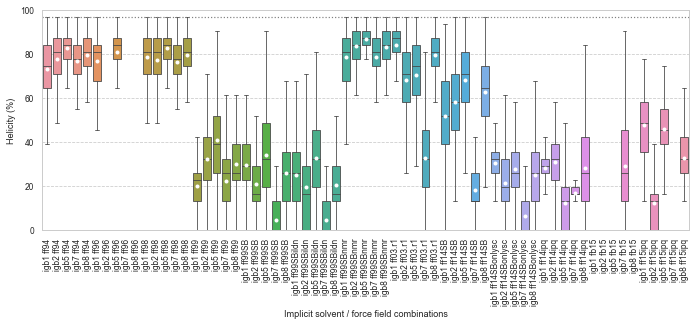

In [17]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_1ns, fliersize=0, linewidth=0.8,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()

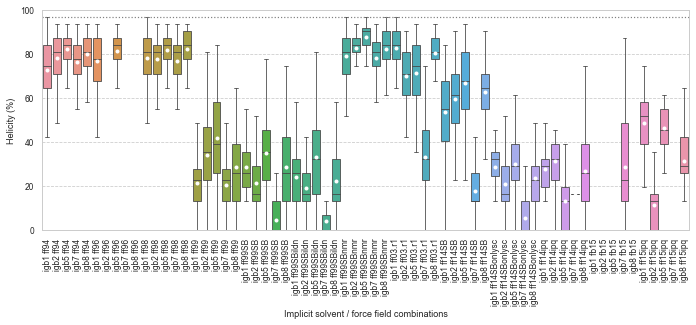

In [18]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_50ns, fliersize=0, linewidth=0.8,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()

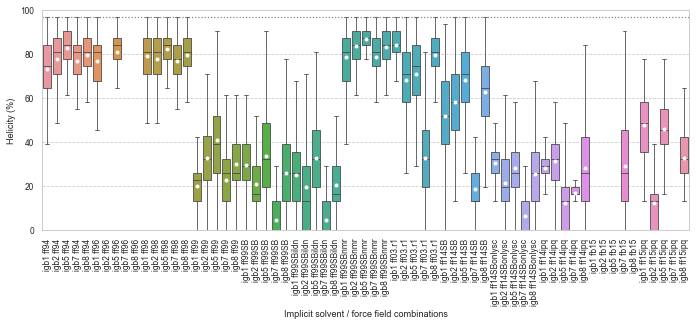

In [10]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_total, fliersize=0, linewidth=0.8,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()
# plt.savefig('./plots/helicity_boxplot3_1.pdf')
# plt.savefig('./plots/helicity_boxplot3_1.png', dpi=300)

In [8]:
df_total['lag']=1
df_1ns['lag']=10
df_5ns['lag']=50
df_10ns['lag']=100
df_50ns['lag']=500

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [9]:
df_all=pd.concat([df_total, df_1ns, df_5ns, df_10ns, df_50ns])
df_all

,Frame,Fraction helicity,Time ($\mu$s),Helicity (%),Mouving average,Mouving std,av-std,av+std,igb,ff,ffigb,igbff,lag
0,2501,0.818,0.0000,87.077419,NaN,NaN,NaN,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
1,2502,0.879,0.0001,93.570968,NaN,NaN,NaN,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
2,2503,0.848,0.0002,90.270968,NaN,NaN,NaN,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
3,2504,0.818,0.0003,87.077419,NaN,NaN,NaN,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
4,2505,0.848,0.0004,90.270968,NaN,NaN,NaN,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55000,57501,0.485,5.5000,51.629032,33.961471,10.634581,23.326890,44.596052,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq,500
55500,58001,0.242,5.5500,25.761290,40.016013,10.949221,29.066792,50.965234,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq,500
56000,58501,0.333,5.6000,35.448387,37.384529,11.132694,26.251835,48.517224,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq,500
56500,59001,0.273,5.6500,29.061290,32.667232,12.405317,20.261915,45.072549,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq,500


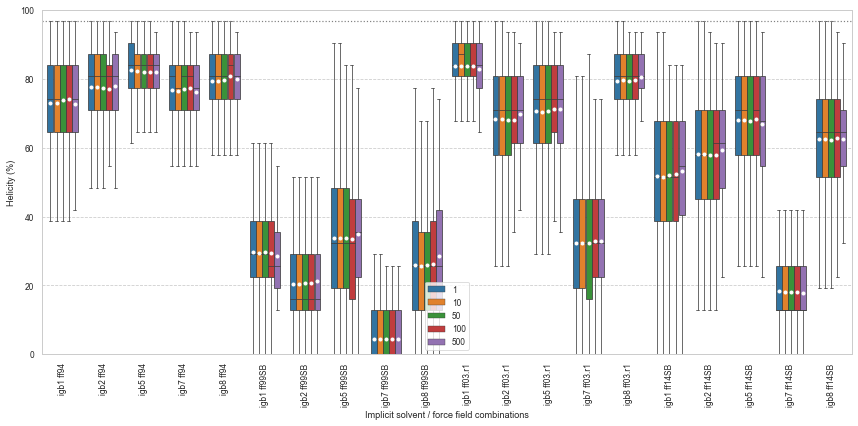

In [53]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(12, 6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='lag', data=df_all, fliersize=0, linewidth=0.75,
               showmeans=True, dodge=True, width=.75,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.legend(loc='lower center')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()
# plt.savefig('./plots/helicity_boxplot4_1.pdf')
# plt.savefig('./plots/helicity_boxplot4_1.png', dpi=300)

In [10]:
df_1ns['start']=1
df_5ns['start']=1
df_10ns['start']=1
df_50ns['start']=1

df_1ns_2['start']=2
df_5ns_2['start']=2
df_10ns_2['start']=2
df_50ns_2['start']=2

df_1ns_3['start']=3
df_5ns_3['start']=3
df_10ns_3['start']=3
df_50ns_3['start']=3

df_1ns_4['start']=4
df_5ns_4['start']=4
df_10ns_4['start']=4
df_50ns_4['start']=4

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [11]:
df_1ns_all=pd.concat([df_1ns, df_1ns_2, df_1ns_3, df_1ns_4])
df_5ns_all=pd.concat([df_5ns, df_5ns_2, df_5ns_3, df_5ns_4])
df_10ns_all=pd.concat([df_10ns, df_10ns_2, df_10ns_3, df_10ns_4])
df_50ns_all=pd.concat([df_50ns, df_50ns_2, df_50ns_3, df_50ns_4])

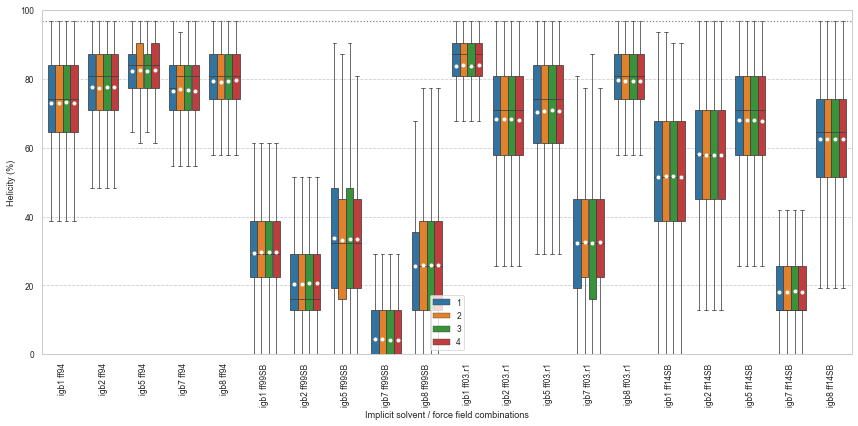

In [54]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


ig, ax = plt.subplots(figsize=(12, 6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='start', data=df_1ns_all, fliersize=0, linewidth=0.75,
               showmeans=True, dodge=True, width=.75,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.legend(loc='lower center')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.savefig('./plots/lag_1ns.png', dpi=300)

plt.tight_layout()

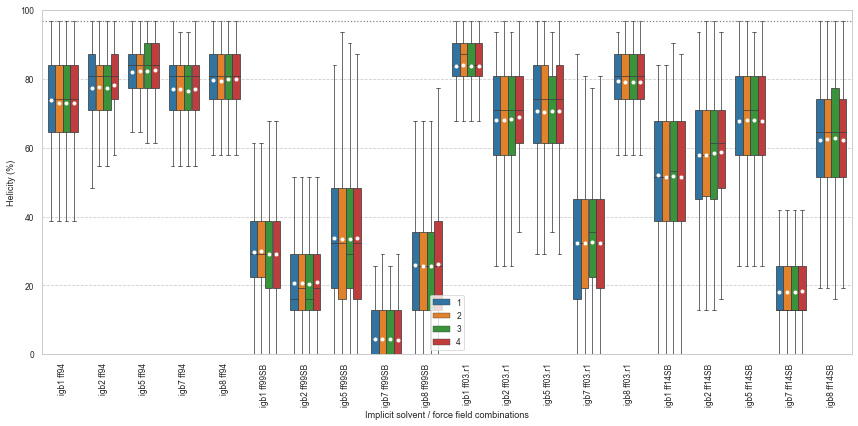

In [55]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


ig, ax = plt.subplots(figsize=(12, 6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='start', data=df_5ns_all, fliersize=0, linewidth=0.75,
               showmeans=True, dodge=True, width=.75,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.legend(loc='lower center')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.savefig('./plots/lag_5ns.png', dpi=300)

plt.tight_layout()

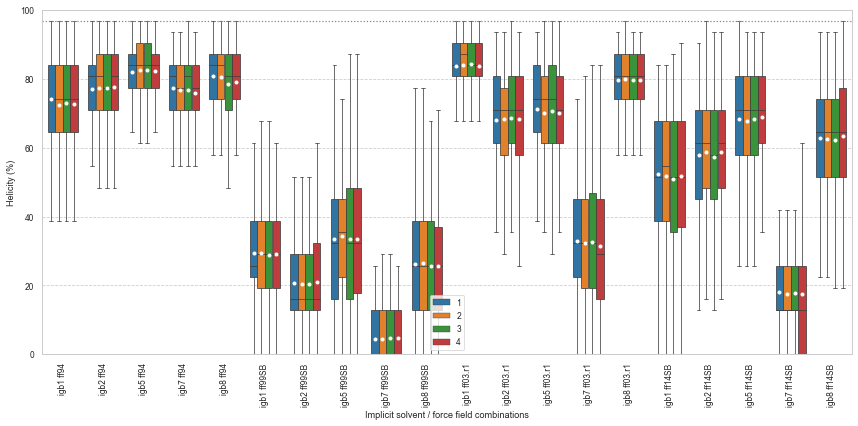

In [56]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})

ig, ax = plt.subplots(figsize=(12, 6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='start', data=df_10ns_all, fliersize=0, linewidth=0.75,
               showmeans=True, dodge=True, width=.75,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.legend(loc='lower center')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.savefig('./plots/lag_10ns.png', dpi=300)

plt.tight_layout()

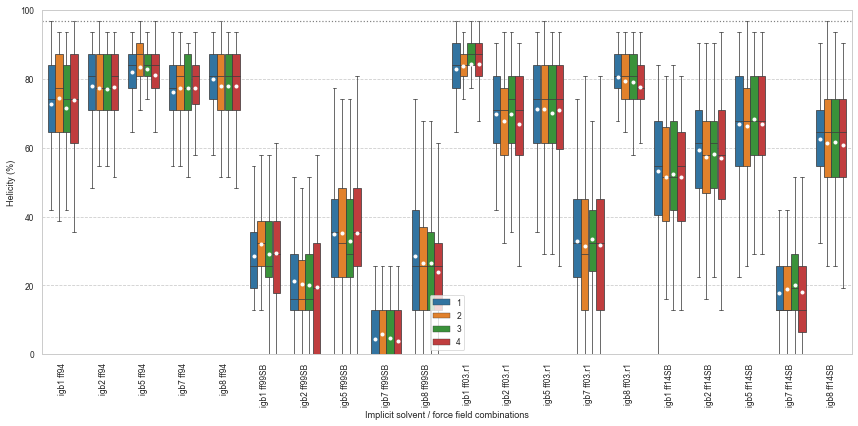

In [57]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


ig, ax = plt.subplots(figsize=(12, 6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='start', data=df_50ns_all, fliersize=0, linewidth=0.75,
               showmeans=True, dodge=True, width=.75,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.legend(loc='lower center')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.savefig('./plots/lag_50ns.png', dpi=300)

plt.tight_layout()

In [18]:
df_1ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].std().mean()

Helicity (%)    0.24599
dtype: float64

In [19]:
df_5ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].std().mean()

Helicity (%)    0.789833
dtype: float64

In [21]:
df_10ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].std().mean()

Helicity (%)    0.574051
dtype: float64

In [48]:
df_50ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].std().mean()

Helicity (%)    1.278134
dtype: float64

,igbff,Helicity (%)
0,igb1 fb15,0.000000
1,igb1 ff03.r1,83.883871
2,igb1 ff14SB,51.629032
3,igb1 ff14SBonlysc,32.254839
4,igb1 ff14ipq,29.061290
...,...,...
60,igb8 ff98,80.690323
61,igb8 ff99,25.761290
62,igb8 ff99SB,25.761290
63,igb8 ff99SBildn,12.880645


In [49]:
min=df_1ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].min()
max=df_1ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].max()
max.columns = ['igbff', 'max']
df_temp=min
df_temp.columns = ['igbff', 'min']
df_minmax=df_temp.join(max.set_index('igbff'), on='igbff')
df_minmax['diff']=df_minmax['max']-df_minmax['min']
df_1ns_minmax=df_minmax

In [50]:
min=df_5ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].min()
max=df_5ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].max()
max.columns = ['igbff', 'max']
df_temp=min
df_temp.columns = ['igbff', 'min']
df_minmax=df_temp.join(max.set_index('igbff'), on='igbff')
df_minmax['diff']=df_minmax['max']-df_minmax['min']
df_5ns_minmax=df_minmax

In [51]:
min=df_10ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].min()
max=df_10ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].max()
max.columns = ['igbff', 'max']
df_temp=min
df_temp.columns = ['igbff', 'min']
df_minmax=df_temp.join(max.set_index('igbff'), on='igbff')
df_minmax['diff']=df_minmax['max']-df_minmax['min']
df_minmax
df_10ns_minmax=df_minmax

In [52]:
min=df_50ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].min()
max=df_50ns_all.groupby(['igbff','start'], as_index=False)['Helicity (%)'].median().groupby(
    ['igbff'], as_index=False)['Helicity (%)'].max()
max.columns = ['igbff', 'max']
df_temp=min
df_temp.columns = ['igbff', 'min']
df_minmax=df_temp.join(max.set_index('igbff'), on='igbff')
df_minmax['diff']=df_minmax['max']-df_minmax['min']
df_50ns_minmax=df_minmax

In [59]:
maxdiff=[]
maxdiff.append(df_1ns_minmax['diff'].max())
maxdiff.append(df_5ns_minmax['diff'].max())
maxdiff.append(df_10ns_minmax['diff'].max())
maxdiff.append(df_50ns_minmax['diff'].max())
maxdiff

[3.299999999999999, 3.299999999999999, 9.68709677419355, 12.880645161290323]

In [60]:
stddiff=[]
stddiff.append(df_1ns_minmax['diff'].std())
stddiff.append(df_5ns_minmax['diff'].std())
stddiff.append(df_10ns_minmax['diff'].std())
stddiff.append(df_50ns_minmax['diff'].std())
stddiff

[0.9524239457135286, 1.4006328239378787, 1.8424998850102288, 2.744858066029915]

In [61]:
meandiff=[]
meandiff.append(df_1ns_minmax['diff'].mean())
meandiff.append(df_5ns_minmax['diff'].mean())
meandiff.append(df_10ns_minmax['diff'].mean())
meandiff.append(df_50ns_minmax['diff'].mean())
meandiff

[0.3013399503722083, 0.8941935483870969, 1.1414888337468985, 2.579404466501241]

In [62]:
cidiff=[]
cidiff.append(df_1ns_minmax['diff'].std()*3)
cidiff.append(df_5ns_minmax['diff'].std()*3)
cidiff.append(df_10ns_minmax['diff'].std()*3)
cidiff.append(df_50ns_minmax['diff'].std()*3)
cidiff

[2.857271837140586, 4.201898471813636, 5.527499655030686, 8.234574198089746]

In [69]:
lag=[1,5,10,50]

In [73]:
df_stat=pd.DataFrame(({'Lag time (ns)':lag, 'mean':meandiff, 'std':stddiff, 'max':maxdiff}))
df_stat

,Lag time (ns),mean,std,max
0,1,0.301340,0.952424,3.300000
1,5,0.894194,1.400633,3.300000
2,10,1.141489,1.842500,9.687097
3,50,2.579404,2.744858,12.880645


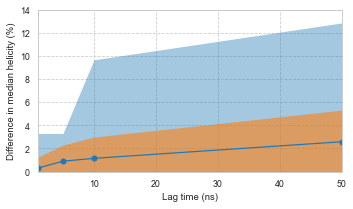

In [143]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(5, 3))

#plt.errorbar( df_stat['Lag time (ns)'], df_stat['mean'], yerr=df_stat['std'], 
#             fmt='o', color='Black', elinewidth=1,capthick=1,errorevery=1, alpha=1, ms=5, capsize = 2)
#plt.plot( df_stat['Lag time (ns)'], df_stat['max'], ls='', marker='_', ms=5)
plt.plot( df_stat['Lag time (ns)'], df_stat['mean'], ls='-', marker='o', ms=5)
plt.fill_between(df_stat['Lag time (ns)'], 0, df_stat['max'],alpha=0.4, lw=0)
plt.fill_between(df_stat['Lag time (ns)'], 0, df_stat['mean']+df_stat['std'],alpha=0.6, lw=0)


# plt.plot(x='Lag time (ns)', y='mean', data=df_stat, hue="Lag time (ns)")

# plt.fill_between, r'Time ($\mu$s)','av-std', 'av+std', alpha=0.6, lw=0).set_titles("{col_name}")

# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 14])  
ax.set_xlim([1, 50]) 
ax.set_xlabel('Lag time (ns)')
ax.set_ylabel('Difference in median helicity (%)')
# ax.get_legend().remove()
# plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./plots/effect_lag_on_diff_with_different_starts.pdf')
plt.savefig('./plots/effect_lag_on_diff_with_different_starts.png', dpi=300)

In [136]:
ref=df_total.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
lag1=df_1ns.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
ref.columns = ['ffigb', 'ref']
df_ref=ref
lag1.columns = ['ffigb', 'lag1']

df_lag1=df_ref.join(lag1.set_index('ffigb'), on='ffigb')
df_lag1['diff']=abs(df_lag1['ref']-df_lag1['lag1'])
df_lag_1ns=df_lag1

ref=df_total.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
lag1=df_5ns.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
ref.columns = ['ffigb', 'ref']
df_ref=ref
lag1.columns = ['ffigb', 'lag1']

df_lag1=df_ref.join(lag1.set_index('ffigb'), on='ffigb')
df_lag1['diff']=abs(df_lag1['ref']-df_lag1['lag1'])
df_lag_5ns=df_lag1

ref=df_total.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
lag1=df_10ns.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
ref.columns = ['ffigb', 'ref']
df_ref=ref
lag1.columns = ['ffigb', 'lag1']

df_lag1=df_ref.join(lag1.set_index('ffigb'), on='ffigb')
df_lag1['diff']=abs(df_lag1['ref']-df_lag1['lag1'])
df_lag_10ns=df_lag1

ref=df_total.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
lag1=df_50ns.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
ref.columns = ['ffigb', 'ref']
df_ref=ref
lag1.columns = ['ffigb', 'lag1']

df_lag1=df_ref.join(lag1.set_index('ffigb'), on='ffigb')
df_lag1['diff']=abs(df_lag1['ref']-df_lag1['lag1'])
df_lag_50ns=df_lag1

In [137]:
maxdiff=[]
maxdiff.append(df_lag_1ns['diff'].max())
maxdiff.append(df_lag_5ns['diff'].max())
maxdiff.append(df_lag_10ns['diff'].max())
maxdiff.append(df_lag_50ns['diff'].max())

meandiff=[]
meandiff.append(df_lag_1ns['diff'].mean())
meandiff.append(df_lag_5ns['diff'].mean())
meandiff.append(df_lag_10ns['diff'].mean())
meandiff.append(df_lag_50ns['diff'].mean())


stddiff=[]
stddiff.append(df_lag_1ns['diff'].std())
stddiff.append(df_lag_5ns['diff'].std())
stddiff.append(df_lag_10ns['diff'].std())
stddiff.append(df_lag_50ns['diff'].std())

lag=[1,5,10,50]

df_stat2=pd.DataFrame(({'Lag time (ns)':lag, 'mean':meandiff, 'std':stddiff, 'max':maxdiff}))
df_stat2

,Lag time (ns),mean,std,max
0,1,0.150670,0.690371,3.3
1,5,0.226005,0.811041,3.3
2,10,0.348834,1.012079,3.3
3,50,0.946600,1.484624,3.3


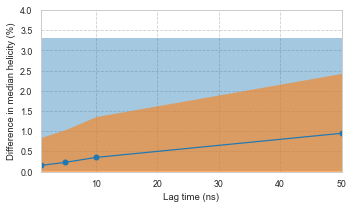

In [144]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(5, 3))

#plt.errorbar( df_stat['Lag time (ns)'], df_stat['mean'], yerr=df_stat['std'], 
#             fmt='o', color='Black', elinewidth=1,capthick=1,errorevery=1, alpha=1, ms=5, capsize = 2)
#plt.plot( df_stat['Lag time (ns)'], df_stat['max'], ls='', marker='_', ms=5)

plt.fill_between(df_stat2['Lag time (ns)'], 0, df_stat2['max'],alpha=0.4, lw=0)
plt.fill_between(df_stat2['Lag time (ns)'], 0, df_stat2['mean']+df_stat2['std'],alpha=0.6, lw=0)
plt.plot( df_stat2['Lag time (ns)'], df_stat2['mean'], ls='-', marker='o', ms=5)


# plt.plot(x='Lag time (ns)', y='mean', data=df_stat, hue="Lag time (ns)")

# plt.fill_between, r'Time ($\mu$s)','av-std', 'av+std', alpha=0.6, lw=0).set_titles("{col_name}")

# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 4])  
ax.set_xlim([1, 50]) 
ax.set_xlabel('Lag time (ns)')
ax.set_ylabel('Difference in median helicity (%)')
# ax.get_legend().remove()
# plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./plots/effect_lag_on_diff_with_all_data.pdf')
plt.savefig('./plots/effect_lag_on_diff_with_all_data.png', dpi=300)

In [135]:
b=df_total.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
pd.set_option('display.max_rows', df_50ns.shape[0]+1)
print(b)

                ffigb  Helicity (%)
0           fb15 igb1      0.000000
1           fb15 igb2      0.000000
2           fb15 igb5      0.000000
3           fb15 igb7     25.761290
4           fb15 igb8      0.000000
5        ff03.r1 igb1     83.883871
6        ff03.r1 igb2     71.003226
7        ff03.r1 igb5     74.196774
8        ff03.r1 igb7     32.254839
9        ff03.r1 igb8     80.690323
10        ff14SB igb1     51.629032
11        ff14SB igb2     58.016129
12        ff14SB igb5     71.003226
13        ff14SB igb7     12.880645
14        ff14SB igb8     64.509677
15  ff14SBonlysc igb1     32.254839
16  ff14SBonlysc igb2     19.374194
17  ff14SBonlysc igb5     25.761290
18  ff14SBonlysc igb7      0.000000
19  ff14SBonlysc igb8     25.761290
20       ff14ipq igb1     29.061290
21       ff14ipq igb2     32.254839
22       ff14ipq igb5     12.880645
23       ff14ipq igb7     16.180645
24       ff14ipq igb8     25.761290
25       ff15ipq igb1     48.435484
26       ff15ipq igb2     12

In [134]:
b=df_1ns.groupby(['ffigb'], as_index=False)['Helicity (%)'].median()
pd.set_option('display.max_rows', df_50ns.shape[0]+1)
print(b)

                ffigb  Helicity (%)
0           fb15 igb1      0.000000
1           fb15 igb2      0.000000
2           fb15 igb5      0.000000
3           fb15 igb7     25.761290
4           fb15 igb8      0.000000
5        ff03.r1 igb1     87.077419
6        ff03.r1 igb2     71.003226
7        ff03.r1 igb5     74.196774
8        ff03.r1 igb7     32.254839
9        ff03.r1 igb8     80.690323
10        ff14SB igb1     51.629032
11        ff14SB igb2     58.016129
12        ff14SB igb5     71.003226
13        ff14SB igb7     12.880645
14        ff14SB igb8     64.509677
15  ff14SBonlysc igb1     32.254839
16  ff14SBonlysc igb2     19.374194
17  ff14SBonlysc igb5     25.761290
18  ff14SBonlysc igb7      0.000000
19  ff14SBonlysc igb8     25.761290
20       ff14ipq igb1     29.061290
21       ff14ipq igb2     32.254839
22       ff14ipq igb5     12.880645
23       ff14ipq igb7     16.180645
24       ff14ipq igb8     25.761290
25       ff15ipq igb1     48.435484
26       ff15ipq igb2     12

#### Average helicity and std dev

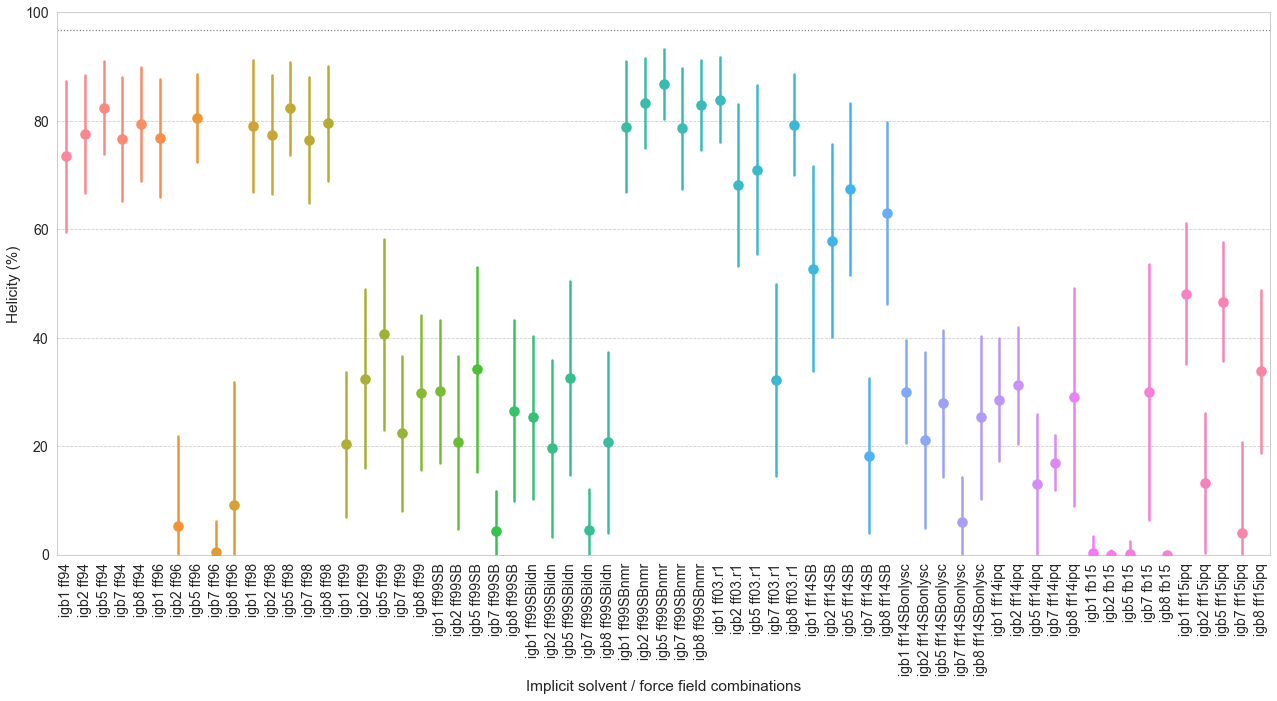

In [30]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(18, 10))

ax=sns.pointplot(x='igbff', y='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="o", scale = 1.5, errwidth=2.5)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd.png', dpi=400)

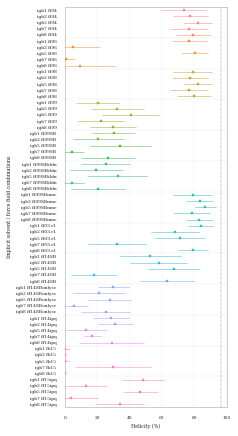

In [68]:
sns.set(context='paper', style='whitegrid', palette='deep', font='serif',\
        font_scale=0.5, rc={'grid.linestyle': '--','grid.linewidth': '0.2'})

fig, axes = plt.subplots(figsize=(3.25, 6))

ax=sns.pointplot(y='igbff', x='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="s", orient="h", scale=0.25, errwidth=0.5)

ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
ax.yaxis.grid(True, which='minor')

plt.axvline(x=96.76, ls='-.', c=".5",lw=0.4 ) # 90.9*33/31

plt.axhline(y=4.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=9.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=14.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=19.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=24.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=29.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=34.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=39.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=44.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=49.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=54.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=59.5, ls='--', c=".75",lw=0.2 )

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd_2.png', dpi=400)

In [ ]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(18, 10))

g=sns.catplot(x='ff', y='Helicity (%)', data=df_total, hue="igb", kind='bar')
#                join=False, ci="sd",
#                 markers="o", scale = 1.5, errwidth=2.5)

# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# g.set_ylim([0, 100])  
# g.set_xlabel('Implicit solvent / force field combinations')
# g.get_legend().remove()
# plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
# plt.savefig('./plots/helicity_mean_sd_3.png', dpi=400)

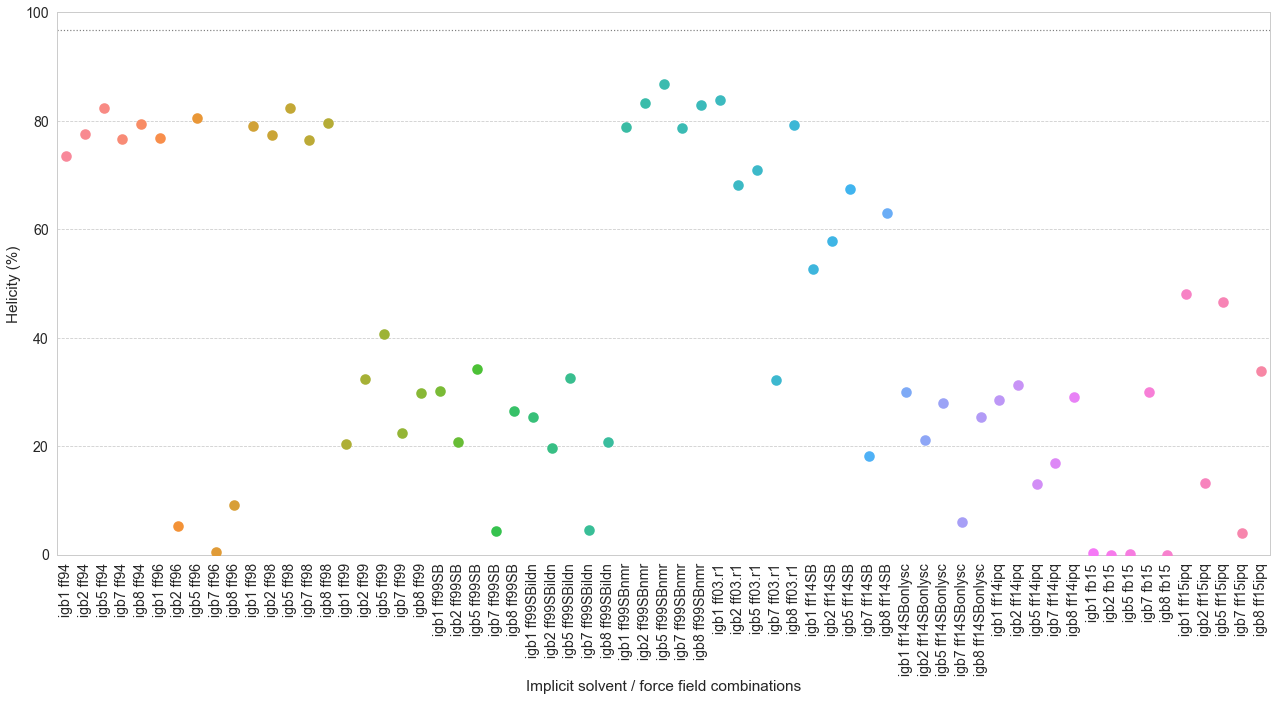

In [66]:
sns.set(context='paper', style='whitegrid', palette='deep', font='serif',\
        font_scale=0.5, rc={'grid.linestyle': '--','grid.linewidth': '0.2'})

fig, axes = plt.subplots(figsize=(3.25, 6))

ax=sns.pointplot(y='igbff', x='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="s", orient="h", scale=0.25, errwidth=0.5)

ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
ax.yaxis.grid(True, which='minor')

plt.axvline(x=96.76, ls='-.', c=".5",lw=0.4 ) # 90.9*33/31

plt.axhline(y=4.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=9.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=14.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=19.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=24.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=29.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=34.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=39.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=44.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=49.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=54.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=59.5, ls='--', c=".75",lw=0.2 )

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd_4.png', dpi=400)